In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
human_path = "../res/human.no_empty_transcript.intragene_isoform_diversity.data.tsv"
mouse_path = "../res/mouse.no_empty_transcript.intragene_isoform_diversity.data.tsv"


human_df = pd.read_csv(human_path, sep='\t')
mouse_df = pd.read_csv(mouse_path, sep='\t')

human_df = human_df[human_df['Type'] == 'Observed']
mouse_df = mouse_df[mouse_df['Type'] == 'Observed']


## Compare orthologues

In [3]:
# create dict to associated bp sim to gene
hs2semsim = pd.Series(human_df["BP similarity"].values, index=human_df['Gene']).to_dict()
mm2semsim = pd.Series(mouse_df["BP similarity"].values, index=mouse_df['Gene']).to_dict()


In [4]:
hm_orthologs_path = "../data/human_mouse_orthologs.tsv"
hm_orthologs = pd.read_csv(hm_orthologs_path, sep='\t')
hm_orthologs

,Gene stable ID,Mouse gene stable ID,Mouse homology type
0,ENSG00000198888,ENSMUSG00000064341,ortholog_one2one
1,ENSG00000198763,ENSMUSG00000064345,ortholog_one2one
2,ENSG00000198804,ENSMUSG00000064351,ortholog_one2one
3,ENSG00000198712,ENSMUSG00000064354,ortholog_one2one
4,ENSG00000228253,ENSMUSG00000064356,ortholog_one2one
...,...,...,...
26355,ENSG00000198799,ENSMUSG00000032913,ortholog_one2one
26356,ENSG00000143631,ENSMUSG00000102439,ortholog_one2one
26357,ENSG00000143520,ENSMUSG00000049133,ortholog_one2one
26358,ENSG00000143507,ENSMUSG00000039384,ortholog_one2one


In [5]:
def compare_ortho(ortho_path, ref_df, other_df, species_id_col, homology_type_col):
    
    orthologs = pd.read_csv(ortho_path, sep='\t')
    orthologs = orthologs[orthologs[homology_type_col]=='ortholog_one2one']
    ref_semsim = pd.Series(ref_df["BP similarity"].values, index=ref_df['Gene']).to_dict()
    other_semsim = pd.Series(other_df["BP similarity"].values, index=other_df['Gene']).to_dict()
    ref_niso = pd.Series(ref_df["Number of isoform"].values, index=ref_df['Gene']).to_dict()
    other_niso = pd.Series(other_df["Number of isoform"].values, index=other_df['Gene']).to_dict()

    # count_ref_gene = orthologs['Gene stable ID'].value_counts().to_dict()
    # uniq_ref_gene = {gene for gene in count_ref_gene if count_ref_gene[gene] == 1}
    # count_other_gene = orthologs[species_id_col].value_counts().to_dict()
    # uniq_other_gene = {gene for gene in count_other_gene if count_other_gene[gene] == 1}
    # orthologs = orthologs[orthologs['Gene stable ID'].isin(set(uniq_ref_gene))]
    # orthologs = orthologs[orthologs[species_id_col].isin(set(uniq_other_gene))]
    orthologs = orthologs[orthologs['Gene stable ID'].isin(set(ref_semsim))]
    orthologs = orthologs[orthologs[species_id_col].isin(set(other_semsim))]
    print(len(orthologs), '1:1 orthologs')

    orthologs["ref semsim"] = orthologs['Gene stable ID'].apply(ref_semsim.get)
    orthologs["other semsim"] = orthologs[species_id_col].apply(other_semsim.get)
    orthologs["ref niso"] = orthologs['Gene stable ID'].apply(ref_niso.get)
    orthologs["other niso"] = orthologs[species_id_col].apply(other_niso.get)

    print(len(orthologs[(orthologs['ref niso'] == 1) & (orthologs['other niso'] == 1)]), ' orthologs pairs with 1 isoforms each')
    print(len(orthologs[(orthologs['ref niso'] != 1) & (orthologs['other niso'] == 1)]), ' orthologs pairs with 1 isoforms in other and more in ref')
    print(len(orthologs[(orthologs['ref niso'] == 1) & (orthologs['other niso'] != 1)]), ' orthologs pairs with multiple isoforms in other and 1 in ref')
    print(len(orthologs[(orthologs['ref niso'] != 1) & (orthologs['other niso'] != 1)]), ' orthologs pairs with multiple isoforms in other and ref')

    return orthologs


hm_orthologs = compare_ortho( "../data/human_mouse_orthologs.tsv", human_df, mouse_df, 'Mouse gene stable ID', 'Mouse homology type')


14151 1:1 orthologs
3034  orthologs pairs with 1 isoforms each
3717  orthologs pairs with 1 isoforms in other and more in ref
1305  orthologs pairs with multiple isoforms in other and 1 in ref
6095  orthologs pairs with multiple isoforms in other and ref


In [6]:
hm_orthologs

,Gene stable ID,Mouse gene stable ID,Mouse homology type,ref semsim,other semsim,ref niso,other niso
1,ENSG00000198763,ENSMUSG00000064345,ortholog_one2one,1.00,1.000,1,1
5,ENSG00000198899,ENSMUSG00000064357,ortholog_one2one,1.00,1.000,1,1
6,ENSG00000198938,ENSMUSG00000064358,ortholog_one2one,1.00,1.000,1,1
9,ENSG00000198886,ENSMUSG00000064363,ortholog_one2one,1.00,1.000,1,1
10,ENSG00000198786,ENSMUSG00000064367,ortholog_one2one,1.00,1.000,1,1
...,...,...,...,...,...,...,...
26352,ENSG00000132694,ENSMUSG00000041977,ortholog_one2one,0.92,0.982,2,3
26353,ENSG00000172339,ENSMUSG00000039887,ortholog_one2one,1.00,1.000,1,1
26354,ENSG00000155380,ENSMUSG00000032902,ortholog_one2one,1.00,1.000,1,1
26355,ENSG00000198799,ENSMUSG00000032913,ortholog_one2one,1.00,1.000,1,3


In [7]:
study_set = hm_orthologs[(hm_orthologs['ref niso'] >=2 ) & (hm_orthologs['other niso'] >=2)]
print(sum((study_set['ref semsim']==1) & (study_set['other semsim']==1)))
print(sum((study_set['ref semsim']!=1) & (study_set['other semsim']==1)))
print(sum((study_set['ref semsim']==1) & (study_set['other semsim']!=1)))
print(sum((study_set['ref semsim']!=1) & (study_set['other semsim']!=1)))

1190
1558
684
2663


0.26206498333500067


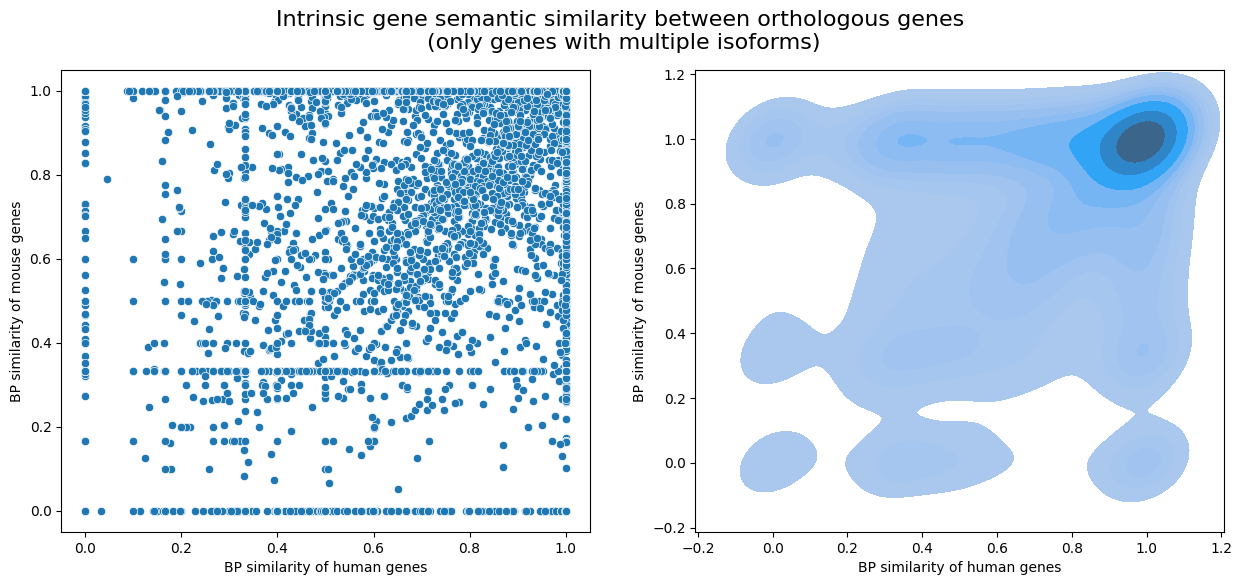

In [8]:
fig, ax =plt.subplots(1,2,figsize=(15, 6))
fig.suptitle('Intrinsic gene semantic similarity between orthologous genes \n(only genes with multiple isoforms)', fontsize=16)
sns.scatterplot(hm_orthologs[(hm_orthologs['ref niso'] >=2 ) & (hm_orthologs['other niso'] >=2)], x="ref semsim", y="other semsim",
                ax=ax[0])
ax[0].set(xlabel='BP similarity of human genes', ylabel='BP similarity of mouse genes')

sns.kdeplot(hm_orthologs[(hm_orthologs['ref niso'] >=2 ) & (hm_orthologs['other niso'] >=2)], x="ref semsim", y="other semsim", fill=True,
            ax=ax[1])
ax[1].set(xlabel='BP similarity of human genes', ylabel='BP similarity of mouse genes')

print(hm_orthologs[(hm_orthologs['ref niso'] >=2 ) & (hm_orthologs['other niso'] >=2)]['ref semsim'].corr(hm_orthologs[(hm_orthologs['ref niso'] >=2 ) & (hm_orthologs['other niso'] >=2)]['other semsim'],'spearman'))



0.4531227614507225


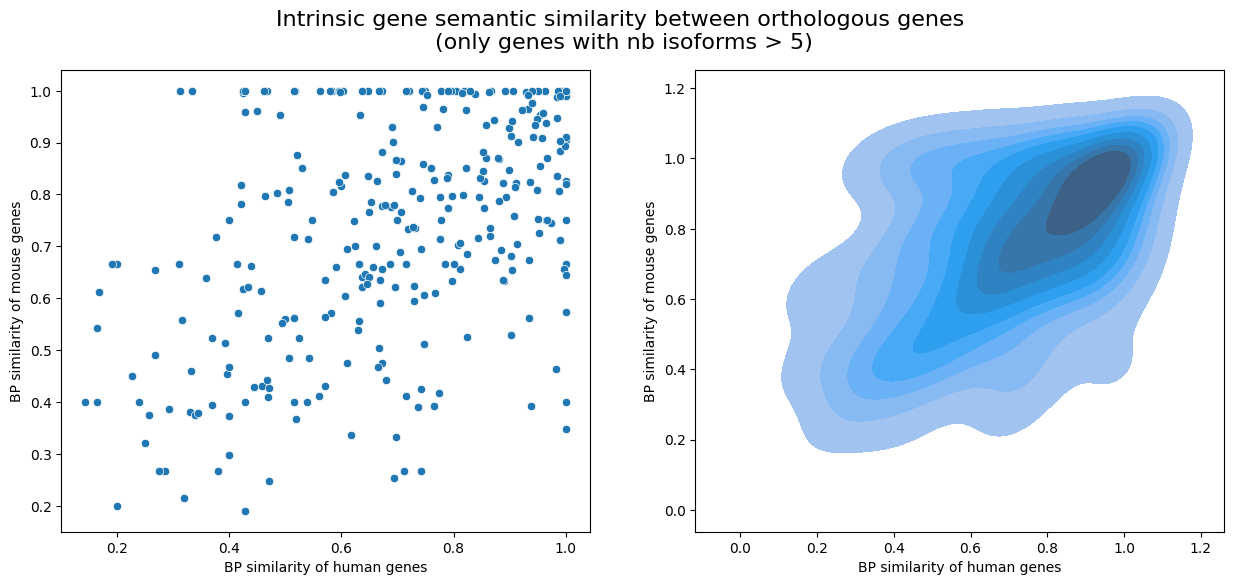

In [14]:
fig, ax =plt.subplots(1,2,figsize=(15, 6))
fig.suptitle('Intrinsic gene semantic similarity between orthologous genes \n(only genes with nb isoforms > 5)', fontsize=16)
sns.scatterplot(hm_orthologs[(hm_orthologs['ref niso'] >=6 ) & (hm_orthologs['other niso'] >=6)], x="ref semsim", y="other semsim",
                ax=ax[0])
ax[0].set(xlabel='BP similarity of human genes', ylabel='BP similarity of mouse genes')

sns.kdeplot(hm_orthologs[(hm_orthologs['ref niso'] >=6 ) & (hm_orthologs['other niso'] >=6)], x="ref semsim", y="other semsim", fill=True,
            ax=ax[1])
ax[1].set(xlabel='BP similarity of human genes', ylabel='BP similarity of mouse genes')

print(hm_orthologs[(hm_orthologs['ref niso'] >=6 ) & (hm_orthologs['other niso'] >=6)]['ref semsim'].corr(hm_orthologs[(hm_orthologs['ref niso'] >=6 ) & (hm_orthologs['other niso'] >=6)]['other semsim'],'spearman'))
